# Import pandas library.

In [63]:
import pandas as pd

# Reading the Data_set.

In [64]:
data= pd.read_csv('C:/Users/Makro_1997/StudentsPerformance.csv')

In [65]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Understand the dataset.

In [66]:
data.shape

(1000, 8)

In [67]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [68]:
data.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [69]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Observation : There is no null values in the dataset.

In [70]:
data['mean_score'] = ((data['math score'] + data['reading score'] + data['writing score'])/3).round()

In [71]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [72]:
gen =  data['gender'].value_counts()
gen

female    518
male      482
Name: gender, dtype: int64

# Preprocessing tht dateset.

In [73]:
data= data.drop(['math score','reading score','writing score'],axis=1)

In [74]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_score
0,female,group B,bachelor's degree,standard,none,73.0
1,female,group C,some college,standard,completed,82.0
2,female,group B,master's degree,standard,none,93.0
3,male,group A,associate's degree,free/reduced,none,49.0
4,male,group C,some college,standard,none,76.0


In [75]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_score
995,female,group E,master's degree,standard,completed,94.0
996,male,group C,high school,free/reduced,none,57.0
997,female,group C,high school,free/reduced,completed,65.0
998,female,group D,some college,standard,completed,74.0
999,female,group D,some college,free/reduced,none,83.0


# Encoding the variables.

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['race/ethnicity'] = le.fit_transform(data['race/ethnicity'])
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['lunch'] = le.fit_transform(data['lunch'])
data['test preparation course'] = le.fit_transform(data['test preparation course'])

In [77]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


# Analyzing Gender and Race:
    

C:\Users\Makro_1997\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

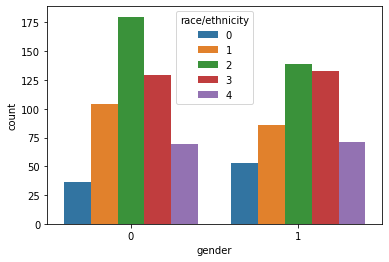

In [78]:
import seaborn as sns
sns.countplot(data['gender'],hue=data['race/ethnicity'])

Observations :  There are more females in the class from group c

In [79]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


1    642
0    358
Name: test preparation course, dtype: int64

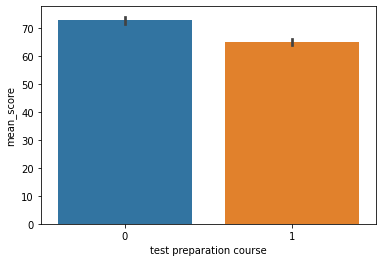

In [80]:
sns.barplot(x= data['test preparation course'], y = data['mean_score'])
cou = data['test preparation course'].value_counts()
cou

Observations : Here who have complete the course they got high mean score.

([<matplotlib.patches.Wedge at 0x1ea56dca5b0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

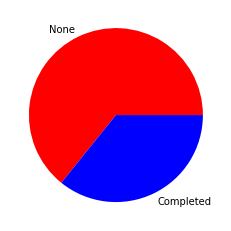

In [81]:
import matplotlib.pyplot as plt
plt.pie(data['test preparation course'].value_counts(),labels=['None','Completed'],colors=['red','blue'])

In [82]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


<AxesSubplot:xlabel='test preparation course', ylabel='mean_score'>

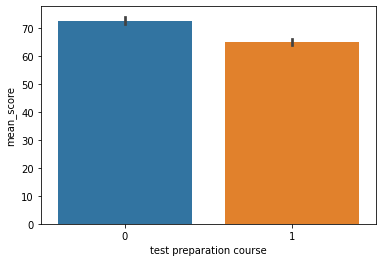

In [83]:
sns.barplot(x = data['test preparation course'],y=data['mean_score'],data=data)

# Analyzing lunch:

<AxesSubplot:xlabel='lunch', ylabel='mean_score'>

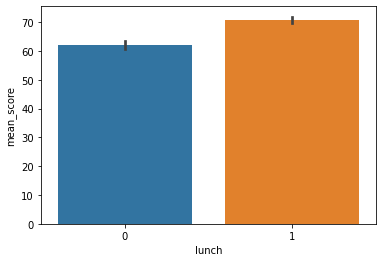

In [84]:
sns.barplot(x=data['lunch'],y=data['mean_score'])

Observations : 1.here who have get free lunch they get low mean score 
               2.who got lunch from home they got high mean score.

# Analyzing parent level education:

In [85]:
par_edu = data['parental level of education'].value_counts()
par_edu

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

<AxesSubplot:xlabel='parental level of education', ylabel='mean_score'>

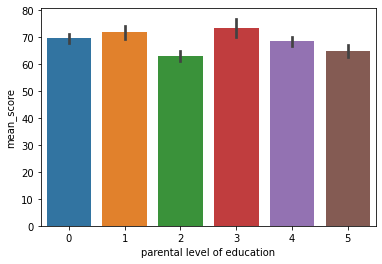

In [86]:
sns.barplot(x=data['parental level of education'],y=data['mean_score'])

Observations : 1.The parents who have master degree their children get high mean score.
               2.The parents who have a high school education their children get low mean score. 

<Figure size 720x360 with 0 Axes>

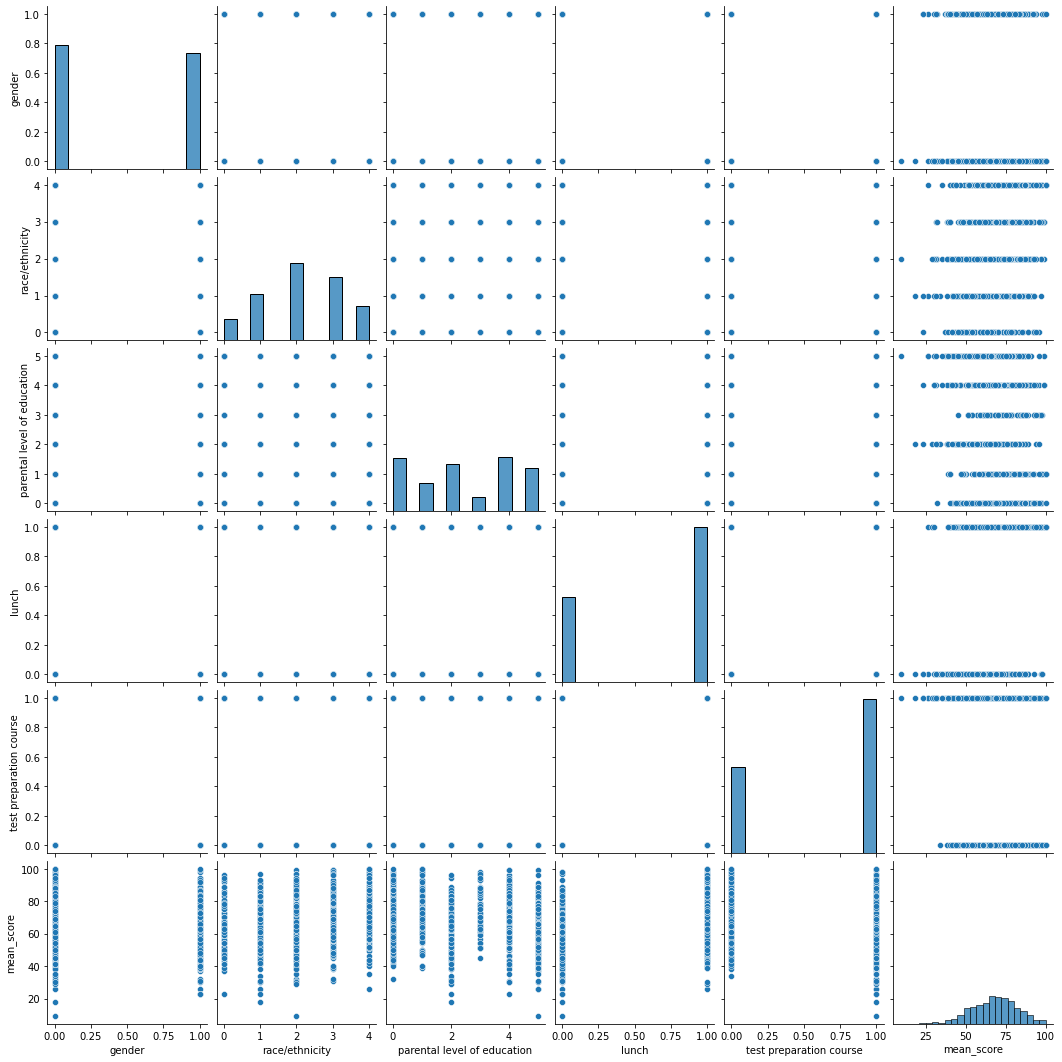

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.pairplot(data)

In [88]:
data.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,-0.131482
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.184822
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.079944
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.289983
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.257194
mean_score,-0.131482,0.184822,-0.079944,0.289983,-0.257194,1.000000


<AxesSubplot:>

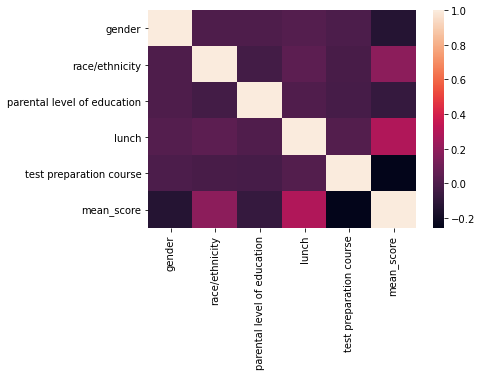

In [89]:
sns.heatmap(data.corr())

In [90]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [91]:
x = data.drop(['mean_score'],axis=1)
y = data['mean_score']

In [92]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1
...,...,...,...,...,...
995,0,4,3,1,0
996,1,2,2,0,1
997,0,2,2,0,0
998,0,3,4,1,0


In [93]:
y

0      73.0
1      82.0
2      93.0
3      49.0
4      76.0
       ... 
995    94.0
996    57.0
997    65.0
998    74.0
999    83.0
Name: mean_score, Length: 1000, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

In [95]:
from sklearn.linear_model import LogisticRegression


In [96]:
le = LogisticRegression(random_state=0)

In [97]:
le.fit(x_train,y_train)

C:\Users\Makro_1997\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [98]:
y_pred = le.predict(x_test)

In [99]:
print(y_pred)

[54. 56. 56. 51. 65. 76. 69. 71. 76. 71. 65. 56. 75. 71. 73. 54. 68. 76.
 67. 68. 73. 54. 67. 68. 56. 56. 55. 68. 54. 76. 67. 82. 67. 67. 75. 71.
 74. 68. 75. 69. 79. 56. 68. 75. 65. 75. 65. 65. 76. 54. 71. 56. 65. 68.
 71. 54. 54. 68. 76. 54. 56. 74. 76. 71. 73. 58. 71. 65. 76. 68. 71. 56.
 71. 75. 71. 71. 79. 71. 67. 65. 82. 69. 87. 73. 87. 69. 56. 75. 76. 54.
 54. 67. 56. 56. 79. 68. 56. 56. 56. 68. 76. 71. 61. 68. 71. 75. 76. 65.
 69. 79. 76. 75. 54. 59. 79. 79. 76. 59. 56. 76. 54. 65. 76. 68. 71. 76.
 73. 76. 76. 79. 79. 79. 56. 79. 76. 53. 71. 56. 69. 79. 71. 67. 79. 68.
 65. 59. 59. 55. 76. 79. 68. 74. 74. 71. 76. 71. 56. 65. 69. 68. 76. 69.
 55. 71. 75. 61. 75. 68. 79. 79. 69. 98. 65. 75. 65. 79. 56. 67. 87. 79.
 68. 65. 56. 68. 76. 71. 75. 87. 54. 68. 68. 68. 58. 67. 59. 51. 76. 73.
 75. 61. 56. 74. 71. 69. 71. 54. 67. 74. 76. 56. 74. 75. 65. 87. 70. 54.
 75. 73. 56. 69. 59. 71. 79. 69. 75. 56. 56. 71. 56. 65. 54. 56. 56. 67.
 55. 79. 69. 76. 76. 65. 75. 67. 75. 68. 76. 79. 55

In [103]:
diffrence = abs(y_pred - y_test)

In [104]:
diffrence.mean()

10.876